C:\Users\WAGNER FERNÁNDEZ\AppData\Local\Temp\ipykernel_20976\1234225524.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df_imputed,
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python

Inercia (Estandarizado): 1189.5432762681128
Inercia (Normalizado): 23.533361209234332
Índice de Silueta (Estandarizado): 0.6284482588892227
Índice de Silueta (Normalizado): 0.6181398460539581


c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Pyt

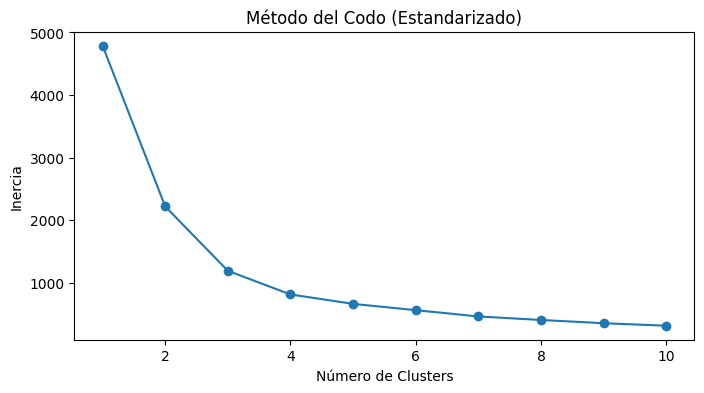

c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\WAGNER FERNÁNDEZ\AppData\Local\Programs\Pyt

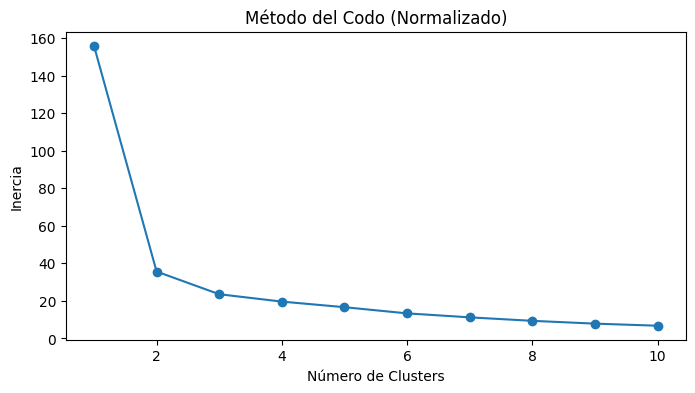

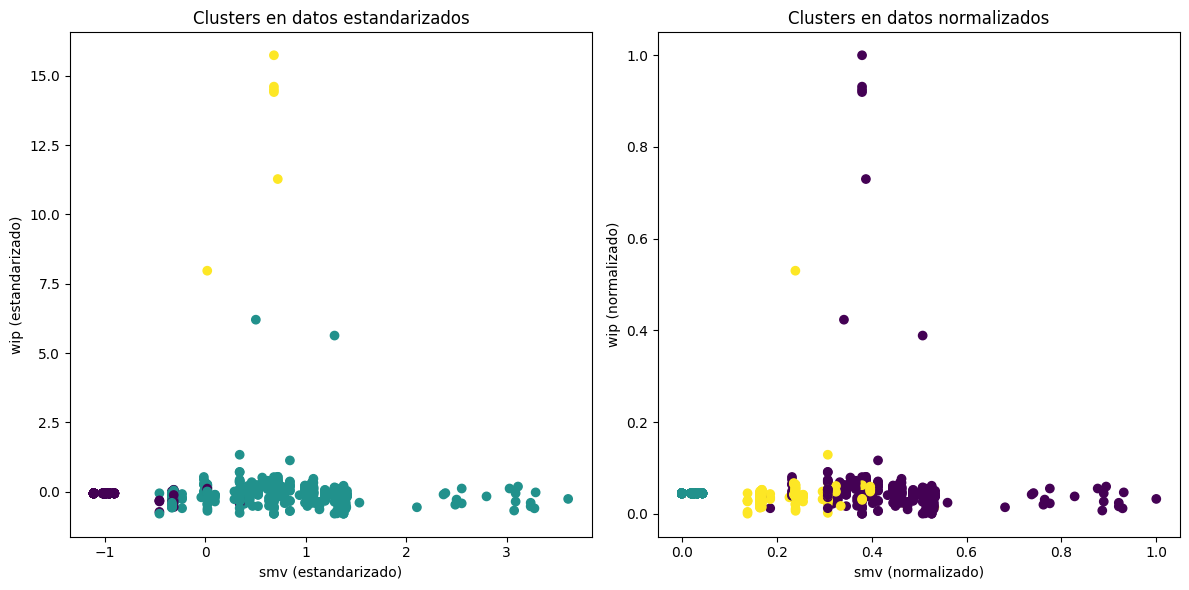

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Leer los datos (ajusta la ruta según tus necesidades)
df = pd.read_csv('C:/Users/WAGNER FERNÁNDEZ/OneDrive - Universidad Nacional Abierta y a Distancia/1.Periodo 1/3-Machine Learning/2-Unidad 2/Fase 4/data/Anexo 2 - Predicción de la productividad de los empleados de la confección.csv')

df_imputed = df['wip'].median()#calcular la mediana de la columna 'wip'

#imputar el df
df['wip'].fillna(df_imputed, 
                 inplace=True)
df

# Seleccionar las columnas numéricas relevantes para el análisis
data = df[['smv', 'wip', 'over_time', 'no_of_workers']]

# Estandarizar los datos
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Normalizar los datos
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

# Crear nuevos dataframes con los datos estandarizados y normalizados
df_standardized = pd.DataFrame(data_standardized, columns=data.columns)
df_normalized = pd.DataFrame(data_normalized, columns=data.columns)

# Definir el número de clusters
num_clusters = 3  # Puedes ajustar esto según tus necesidades

# Aplicar K-Means a los datos estandarizados
kmeans_standardized = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_standardized.fit(data_standardized)
labels_standardized = kmeans_standardized.labels_

# Añadir las etiquetas al dataframe original
df['cluster_standardized'] = labels_standardized

# Aplicar K-Means a los datos normalizados
kmeans_normalized = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_normalized.fit(data_normalized)
labels_normalized = kmeans_normalized.labels_

# Añadir las etiquetas al dataframe original
df['cluster_normalized'] = labels_normalized

# Evaluación del modelo
# Calcular la inercia
inertia_standardized = kmeans_standardized.inertia_
inertia_normalized = kmeans_normalized.inertia_

# Calcular el índice de silueta
silhouette_standardized = silhouette_score(data_standardized, labels_standardized)
silhouette_normalized = silhouette_score(data_normalized, labels_normalized)

print(f'Inercia (Estandarizado): {inertia_standardized}')
print(f'Inercia (Normalizado): {inertia_normalized}')
print(f'Índice de Silueta (Estandarizado): {silhouette_standardized}')
print(f'Índice de Silueta (Normalizado): {silhouette_normalized}')

# Método del codo
def plot_elbow(data, title):
    inertias = []
    range_clusters = range(1, 11)
    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(8, 4))
    plt.plot(range_clusters, inertias, marker='o')
    plt.title(title)
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.show()

plot_elbow(data_standardized, 'Método del Codo (Estandarizado)')
plot_elbow(data_normalized, 'Método del Codo (Normalizado)')

# Visualización de los clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], c=labels_standardized, cmap='viridis')
plt.title('Clusters en datos estandarizados')
plt.xlabel('smv (estandarizado)')
plt.ylabel('wip (estandarizado)')

plt.subplot(1, 2, 2)
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels_normalized, cmap='viridis')
plt.title('Clusters en datos normalizados')
plt.xlabel('smv (normalizado)')
plt.ylabel('wip (normalizado)')

plt.tight_layout()
plt.show()
